In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#https://raw.githubusercontent.com/MI2-Education/2023L-ExploratoryDataAnalysis/main/homeworks/hw6/house_data.csv

df = pd.read_csv("https://raw.githubusercontent.com/MI2-Education/2023L-ExploratoryDataAnalysis/main/homeworks/hw6/house_data.csv",
                delimiter = ",").dropna().reset_index(drop = True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Zadanie 1. a Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?

In [ ]:
grade_median = df.grade.median()
df.loc[(df.waterfront == 1) & (df.grade >= grade_median)].price.mean()

1784151.7006802722

Odp. 1784151.7006802722

Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?

In [ ]:
df.loc[(df.floors == 2)].bathrooms.median() > df.loc[(df.floors == 3)].bathrooms.median()

False

Odp. Nie
c Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [ ]:
display(df.groupby('waterfront').grade.quantile(.25))
df.groupby('waterfront').grade.quantile(.75)

waterfront
0    7.0
1    8.0
Name: grade, dtype: float64

waterfront
0     8.0
1    10.0
Name: grade, dtype: float64

Odp Dla przy wodzie 8, 10, a dla nie przy wodzie 7, 8.

d Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

In [ ]:
display(df.groupby('zipcode').id.count().sort_values(ascending = False).head(1))
q25 = df.loc[(df.zipcode == 98103)].price.quantile(.25)
q75 = df.loc[(df.zipcode == 98103)].price.quantile(.75)
q75 - q25

zipcode
98103    602
Name: id, dtype: int64

262875.0

Odp. Rozstęp międzykwartylowy wynosi 262875.0.

e Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni? Zakładam, że chodzi o powierzchnie mieszkaniową !



In [ ]:
df.loc[(df.sqft_living15 > df.sqft_living)].id.count()/df.id.count() * 100

42.594734650441865

Odp. Około 43%.

f O ile procent więcej jest nieruchomości leżcych na północy zachód niż nieruchomości leżących na południowy wschód?

od czego? Nie rozumiem o co chodzi w poleceniu :((

0        0
1        0
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: view, Length: 21613, dtype: int64

ZADANIE 2

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

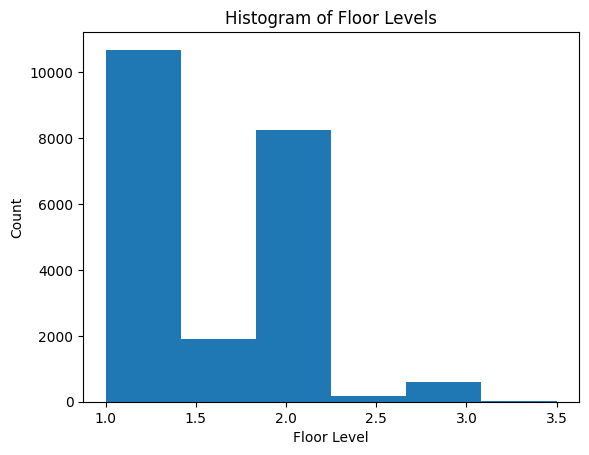

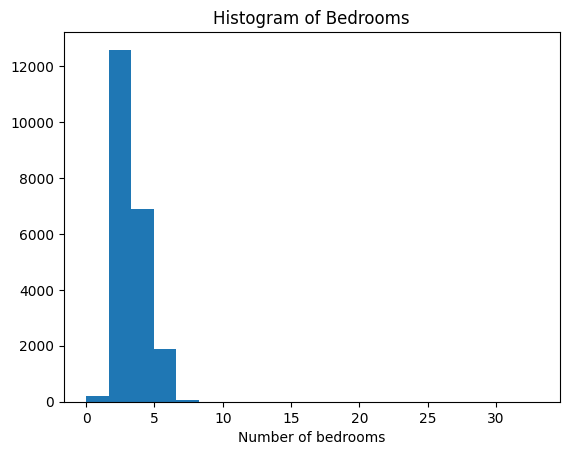

In [ ]:
# a
import matplotlib.pyplot as plt
plt.hist(df['floors'], bins=len(df['floors'].unique()), align='mid')
plt.xlabel('Floor Level')
plt.ylabel('Count')
plt.title('Histogram of Floor Levels')
plt.show()
# b
plt.hist(df['bedrooms'], bins = 20)
plt.xlabel('Number of bedrooms')
plt.title('Histogram of Bedrooms')
plt.show()
